In [2]:
#se definen las librerias con las que se trabaja

import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np

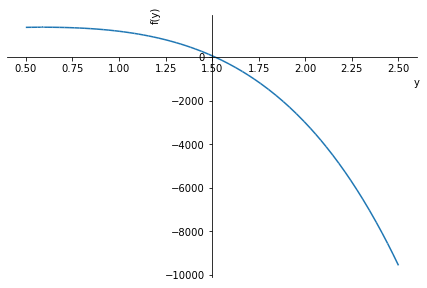

In [4]:
y = Symbol('y')
f = 400*(3+y)-9.81*(3*y+0.5*y**2)**3 #Funcion a trabajar
plot(f,(y,0.5,2.5)) 

In [5]:
#Metodo de la Biseccion

def f(x): return 400*(3+x)-9.81*(3*x+0.5*x**2)**3 #funcion a ejecutar en el metodo
a=0.5
b=2.5
e=0.01 
r=0
S=[a]
Error=[1]
relativo = [np.absolute((b-a)/(b))]
Conv = []
while relativo[r]>=e:
    r = r+1
    c=(a+b)/2
    print("La solución aproximada en la i-esima iteración es c=",c)
    if f(c)==0:
        print("La solución obtiene en x=",c)
    else:
        if f(a)*f(c)>0:
            a=c
        else:
            b=c
    Anterior = r-1
    S.append(c)
    absoluto = np.absolute(S[r]-S[Anterior])
    rela = np.absolute((S[r]-S[Anterior])/S[r])
    relativo.append(rela)
    Error.append(absoluto)
    Razon = (Error[r]/Error[1])
    Conv.append(Razon)
    print("Error absoluto =",absoluto)
    print("Error relativo =",relativo[r])
    print("Razón convergencia =",Conv)

La solución aproximada en la i-esima iteración es c= 1.5
Error absoluto = 1.0
Error relativo = 0.6666666666666666
Razón convergencia = [1.0]
La solución aproximada en la i-esima iteración es c= 2.0
Error absoluto = 0.5
Error relativo = 0.25
Razón convergencia = [1.0, 0.5]
La solución aproximada en la i-esima iteración es c= 1.75
Error absoluto = 0.25
Error relativo = 0.14285714285714285
Razón convergencia = [1.0, 0.5, 0.25]
La solución aproximada en la i-esima iteración es c= 1.625
Error absoluto = 0.125
Error relativo = 0.07692307692307693
Razón convergencia = [1.0, 0.5, 0.25, 0.125]
La solución aproximada en la i-esima iteración es c= 1.5625
Error absoluto = 0.0625
Error relativo = 0.04
Razón convergencia = [1.0, 0.5, 0.25, 0.125, 0.0625]
La solución aproximada en la i-esima iteración es c= 1.53125
Error absoluto = 0.03125
Error relativo = 0.02040816326530612
Razón convergencia = [1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125]
La solución aproximada en la i-esima iteración es c= 1.515625
Er

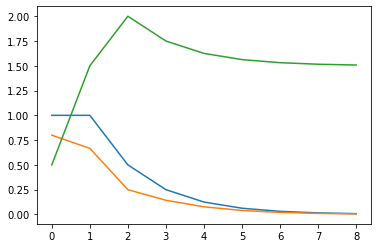

In [7]:
#se grafican los errores para comparar

plt.plot(Error)
plt.plot(relativo)
plt.plot(S)

In [8]:
#Metodo de la Falsa Posicion

def metodo_falsapos(f, a, b, tol=10**-4, n=50):
    """
    Método de falsa posicion
    :parametro f: Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0, previamente definida
    :parametro a: límite inferior
    :parametro b: límite superior
    :parametro tol: toleracia, criterio de parada
    :parametro n: número máximo de iteraciones, criterio de parada
    :return: solución exacta o aproximada, si tiene.
    """
    if f(a)*f(b) >= 0:  # el intevalo escogido no sirve
        print('El intervalo no funciona, f(a)={:.2f} y f(b)={:.2f}'.format(f(a),f(b)))
        return None
    
    e_abs = abs(b-a)
    i = 1
    c = a - (f(a)*(b - a))/(f(b) - f(a))
    while i <= n and e_abs > tol:
        c_1 = c
        print('ite {:<2}: a_{:<2}={:.7f} , b_{:<2}={:.7f}, c_{:<2}={:.7f}'.format(i,i-1,a,i-1,b,i,c_1))
        
        if f(c_1)==0:  # solución exacta encontrada
            print('Solución encontrada x={:.7f}'. format(c_1))
            return c_1
        
        if f(a)*f(c)<0:  # escoger intervalo izquierdo
            b = c_1
        else:  # escoger intervalo derecho
            a = c_1
            
        c = a - (f(a)*(b - a))/(f(b) - f(a))
        
        e_abs = abs(c_1 - c)  # error absoluto
        
        if e_abs < tol:  # criterio de parada
            print('Solución encontrada x= {:.7f}, iteraciones: {}'. format(c,i))
            return c
        
        i += 1
    print ('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None

In [9]:
def f(x):
    return 400*(3+x)-9.81*(3*x+0.5*x**2)**3 #Se define la funcion a trabajar apara el metodo de falsa posicion

In [10]:
metodo_falsapos(f, 0.5, 2.5, tol=0.01, n=500) #se llama a la funcion de la falsa posicion

ite 1 : a_0 =0.5000000 , b_0 =2.5000000, c_1 =0.7485950
ite 2 : a_1 =0.7485950 , b_1 =2.5000000, c_2 =0.9639595
ite 3 : a_2 =0.9639595 , b_2 =2.5000000, c_3 =1.1370096
ite 4 : a_3 =1.1370096 , b_3 =2.5000000, c_4 =1.2659440
ite 5 : a_4 =1.2659440 , b_4 =2.5000000, c_5 =1.3558838
ite 6 : a_5 =1.3558838 , b_5 =2.5000000, c_6 =1.4154839
ite 7 : a_6 =1.4154839 , b_6 =2.5000000, c_7 =1.4535577
ite 8 : a_7 =1.4535577 , b_7 =2.5000000, c_8 =1.4772891
ite 9 : a_8 =1.4772891 , b_8 =2.5000000, c_9 =1.4918488
Solución encontrada x= 1.5006935, iteraciones: 9


1.5006934845708146

In [11]:
#Metodo de la Falsa Posicion Modificada

def metodoFalsaPosicionMod(x1, xu, es ,imax ,xr, iter , ea) : #Se usa la funcion definida para el metodo de falsa poisicion
  iu= 0
  fl =f(x1)
  fu= f(xu)
  while iter<10:
    print(xr)
    xrold = xr
    xr = xu -fu * (x1 - xu)/ ( fl -fu)
    fr = f(xr)
    iter=iter+1
    if xr != 0:
      ea=abs((xr-xrold)/xr)*100
    test= fl*fr

    if test < 0:
      xu= xr
      fu=f(xu)
      iu=0
      il= il+1
      if il>=2:
        fl=fl/2
    elif test > 0:
      xl=xr
      fl =f(x1)
      il=0
      iu=iu+1
      if iu >=2:
        fu=fu/2
      else :
        ea=0
      if ea< es or iter >= imax :
        break
  metodoFalsaPosicionMod=xr


In [12]:
metodoFalsaPosicionMod(0.5,2.5,0,10,0,0,0.01) #se llama a la funcion de falsa posicion modificada

0
0.7485950332927993
0.7485950332927993
0.9422228629203395
1.2242956728224914
1.563461180147291
1.4255655064690036
1.4255655064690036
1.4897333127165173
1.5252735047077806
